<a href="https://colab.research.google.com/github/yoshimethod/bioinformatics/blob/main/bioinformatics_pr3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 8.5 MB/s eta 0:00:00


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import optuna
import pandas as pd
import seaborn as sns
import sklearn
import torch

In [ ]:
#GPUが使用可能であるかを確認する
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [ ]:
import numpy as np

data=[[1,2], [3,4]]
np_data=np.array(data)
print(np_data)

[[1 2]
 [3 4]]


In [ ]:
import torch
tensor_data=torch.tensor(data)
print(tensor_data)

tensor([[1, 2],
        [3, 4]])


In [ ]:
tensor_from_np=torch.from_numpy(np_data)
tensor_from_np

tensor([[1, 2],
        [3, 4]])

In [ ]:
tensor_random=torch.rand_like(tensor_data, dtype=torch.float)
print(tensor_random)

tensor([[0.6808, 0.2675],
        [0.5595, 0.8542]])


In [ ]:
tensor=torch.ones(4,4)
tensor.to(device)
print(tensor)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [ ]:
tensor[:,1]=0
tensor[1,:]=3
print(tensor)

tensor([[1., 0., 1., 1.],
        [3., 3., 3., 3.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [ ]:
print('0行目：', tensor[0])
print('1行目：', tensor[:, 1])
print('最終列：', tensor[:, -1])

0行目： tensor([1., 0., 1., 1.])
1行目： tensor([0., 3., 0., 0.])
最終列： tensor([1., 3., 1., 1.])


In [ ]:
t1=torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [ ]:
tensor @ tensor

tensor([[ 3.,  0.,  3.,  3.],
        [18.,  9., 18., 18.],
        [ 3.,  0.,  3.,  3.],
        [ 3.,  0.,  3.,  3.]])

In [ ]:
tensor * tensor

tensor([[1., 0., 1., 1.],
        [9., 9., 9., 9.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [ ]:
sum_item=tensor.sum().item()
print(sum_item, type(sum_item))

21.0 <class 'float'>


In [ ]:
print(tensor, '\n')
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [3., 3., 3., 3.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [8., 8., 8., 8.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [ ]:
t=torch.ones(5)
print('tensor: ', t)
n=t.numpy()
print('numpy: ', n)

tensor:  tensor([1., 1., 1., 1., 1.])
numpy:  [1. 1. 1. 1. 1.]


In [ ]:
t.add_(1)
print('tensor: ', t)
print('numpy: ', n)

tensor:  tensor([2., 2., 2., 2., 2.])
numpy:  [2. 2. 2. 2. 2.]


In [ ]:
n=np.ones(5)
t=torch.from_numpy(n)

In [ ]:
np.add(n, 3, out=n)
print('tensor: ', t)
print('numpy:', n)

tensor:  tensor([4., 4., 4., 4., 4.], dtype=torch.float64)
numpy: [4. 4. 4. 4. 4.]


In [ ]:
predicted_probability_p=[0.8, 0.2, 0.6]
true_label_t=[1.0, 0, 0]
import numpy as np
BCE_0=-true_label_t[0]*np.log(predicted_probability_p[0])
BCE_1=-(1-true_label_t[1])*np.log(1-predicted_probability_p[1])
BCE_2=-(1-true_label_t[2])*np.log(1-predicted_probability_p[2])
print(BCE_0, BCE_1, BCE_2)

0.2231435513142097 0.2231435513142097 0.916290731874155


In [ ]:
np.mean([BCE_0, BCE_1, BCE_2])

0.45419261150085816

In [ ]:
import torch
import torch.nn as nn

loss=nn.BCELoss()
p_tensor=torch.tensor(predicted_probability_p)
t_tensor=torch.tensor(true_label_t)
loss(p_tensor, t_tensor)

tensor(0.4542)

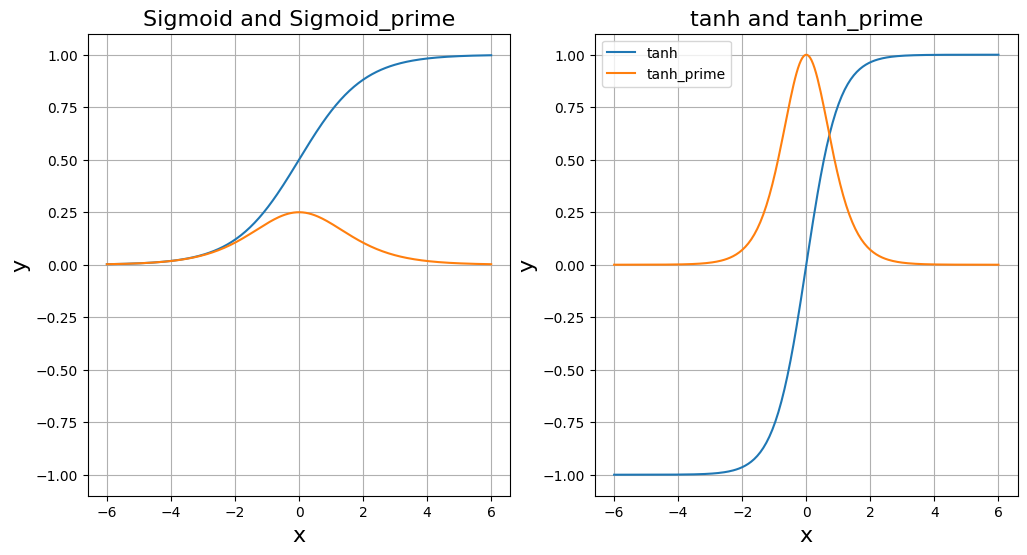

In [ ]:
import matplotlib.pyplot as plt
def sigmoid(x):
  return 1/(1+np.exp(-x))
def sigmoid_prime(x):
  return (np.exp(x))/((1+np.exp(x))**2)
def tanh(x):
  return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
def tanh_prime(x):
  return 4 / (np.exp(x)+np.exp(-x))**2


x=np.linspace(-6, 6, 256)
fig=plt.figure(figsize=(12, 6))

ax1=fig.add_subplot(121)
ax1.set_title('Sigmoid and Sigmoid_prime', size=16)
ax1.set_xlabel('x', size=16)
ax1.set_ylabel('y', size=16)
ax1.grid(axis='both')
ax1.set_ylim(-1.1,1.1)

ax1.plot(x, sigmoid(x), color='#1f77b4', label='sigmoid')
ax1.plot(x, sigmoid_prime(x), color='#ff7f0e', label='sigmoid_prime')

ax2=fig.add_subplot(122)
ax2.set_title('tanh and tanh_prime', size=16)
ax2.set_xlabel('x', size=16)
ax2.set_ylabel('y', size=16)
ax2.grid(axis='both')
ax2.set_ylim(-1.1, 1.1)

ax2.plot(x, tanh(x), color='#1f77b4', label='tanh')
ax2.plot(x, tanh_prime(x), color='#ff7f0e', label='tanh_prime')
ax2.legend()





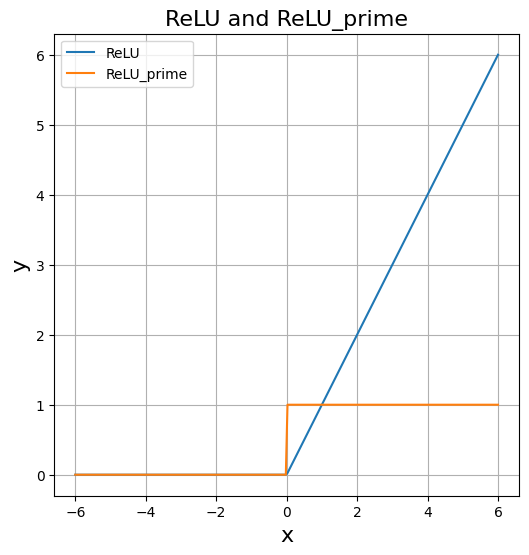

In [ ]:
def ReLU(x):
  return np.maximum(0, x)

def ReLU_prime(x):
  return np.where(x>0, 1, 0)

x=np.linspace(-6, 6, 256)
fig=plt.figure(figsize=(6,6))

ax=fig.add_subplot(111)
ax.set_title('ReLU and ReLU_prime', size=16)
ax.set_xlabel('x', size=16)
ax.set_ylabel('y', size=16)
ax.grid(axis='both')

ax.plot(x, ReLU(x), color='#1f77b4', label='ReLU')
ax.plot(x, ReLU_prime(x), color='#ff7f0e', label='ReLU_prime')
ax.legend()

In [ ]:
import pandas as pd

gse_mRNA_exprs_normal_selected=pd.read_csv('/content/GSE36376_normal.csv', index_col=0)
gse_mRNA_exprs_tumor_selected=pd.read_csv('/content/GSE36376_tumor.csv', index_col=0)

gse_mRNA_exprs_normal_selected.loc['class']=0
gse_mRNA_exprs_tumor_selected.loc['class']=1

from sklearn.model_selection import train_test_split

gse_mRNA_exprs_normal_selected_trainval, gse_mRNA_exprs_normal_selected_test=train_test_split(gse_mRNA_exprs_normal_selected.T, train_size=0.75, random_state=0)
gse_mRNA_exprs_tumor_selected_trainval, gse_mRNA_exprs_tumor_selected_test=train_test_split(gse_mRNA_exprs_tumor_selected.T, train_size=0.75, random_state=0)

gse_mRNA_exprs_normal_selected_train, gse_mRNA_exprs_normal_selected_val = train_test_split(gse_mRNA_exprs_normal_selected_trainval, train_size=0.667, random_state=0)
gse_mRNA_exprs_tumor_selected_train, gse_mRNA_exprs_tumor_selected_val = train_test_split(gse_mRNA_exprs_tumor_selected_trainval, train_size=0.667, random_state=0)

gse_mRNA_exprs_train=pd.concat([gse_mRNA_exprs_normal_selected_train, gse_mRNA_exprs_tumor_selected_train])
X_train=gse_mRNA_exprs_train.iloc[:, 0:-1]
y_train=gse_mRNA_exprs_train.iloc[:, -1]

gse_mRNA_exprs_val=pd.concat([gse_mRNA_exprs_normal_selected_val, gse_mRNA_exprs_tumor_selected_val])
X_val=gse_mRNA_exprs_val.iloc[:, 0:-1]
y_val=gse_mRNA_exprs_val.iloc[:, -1]

gse_mRNA_exprs_test=pd.concat([gse_mRNA_exprs_normal_selected_test, gse_mRNA_exprs_tumor_selected_test])
X_test=gse_mRNA_exprs_test.iloc[:, 0:-1]
y_test=gse_mRNA_exprs_test.iloc[:, -1]

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit(X_train)

X_train_std=sc.transform(X_train)
X_val_std=sc.transform(X_val)
X_test_std=sc.transform(X_test)

FileNotFoundError: [Errno 2] No such file or directory: '/content/GSE36376_normal.csv'

In [ ]:
import torch
torch.manual_seed(42)
torch.cuda.manual_seed(42)
torch.backends.cudnn.deterministic=True
torch.use_deterministic_algorithms=True

In [ ]:
from torch.utils.data import DataLoader, Dataset
class TrainValData(Dataset):
  def __init__(self, X_data, y_data):
    self.X_data=X_data
    self.y_data=y_data
  def __getitem__(self, index):
    return self.X_data[index], self.y_data[index]
  def __len__(self):
    return len(self.X_data)

class TestData(Dataset):
  def __init__(self, X_data):
    self.X_data=X_data
  def __getitem__(self, index):
    return self.X_data[index]
  def __len__(self):
    return len(self.X_data)

train_data=TrainValData(torch.FloatTensor(X_train_std), torch.FloatTensor(y_train))
val_data=TrainValData(torch.FloatTensor(X_val_std), torch.FloatTensor(y_val))
test_data=TestData(torch.FloatTensor(X_test_std))

In [ ]:
BATCH_SIZE=64
train_loader=DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
val_loader=DataLoader(dataset=val_data, batch_size=BATCH_SIZE)
test_loader=DataLoader(dataset=test_data, batch_size=BATCH_SIZE)

In [ ]:
import torch.nn as nn

num_layers=3
num_features=[32, 128, 64]

class BinaryClassificationNet(nn.Module):
  def __init__(self):
    super(BinaryClassificationNet, self).__init__()
    self.layers1=nn.Sequential(nn.Linear(in_features=13, out_features=num_features[0]), nn.BatchNorm1d(num_features[0]), nn.ReLU(),)
    self.layers2=nn.Sequential(nn.Linear(in_features=num_features[0], out_features=num_features[1]), nn.BatchNorm1d(num_features[1]), nn.ReLU(),)
    self.layers3=nn.Sequential(nn.Linear(in_features=num_features[1], out_features=num_features[2]), nn.BatchNorm1d(num_features[2]), nn.ReLU(),)
    self.layers_out=nn.Linear(in_features=num_features[2], out_features=1)

  def forward(self, x):
    x=self.layers1(x)
    x=self.layers2(x)
    x=self.layers3(x)
    x=self.layers_out(x)
    return x

In [ ]:
import torch.optim as optim

device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model=BinaryClassificationNet()
model.to(device)

print(model)

loss_fn=nn.BCEWithLogitsLoss()
LEARNING_RATE=0.001
optimizer=optim.Adam(model.parameters(), lr=LEARNING_RATE)

def binary_acc(y_true, y_pred):
  correct=torch.eq(y_true, y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

BinaryClassificationNet(
  (layers1): Sequential(
    (0): Linear(in_features=13, out_features=32, bias=True)
    (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layers2): Sequential(
    (0): Linear(in_features=32, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layers3): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layers_out): Linear(in_features=64, out_features=1, bias=True)
)


In [ ]:
EPOCHS=400
model.train()

train_loss_li=[]
train_acc_li=[]
val_loss_li=[]
val_acc_li=[]

for epoch in range(EPOCHS):
  for X_batch_train, y_batch_train in train_loader:
    X_batch_train, y_batch_train=X_batch_train.to(device), y_batch_train.to(device)
    y_logits=model(X_batch_train).squeeze()
    y_pred=torch.round(torch.sigmoid(y_logits))

    loss=loss_fn(y_logits, y_batch_train)
    acc =binary_acc(y_true=y_batch_train, y_pred=y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  model.eval()

  with torch.no_grad():
    for X_batch_val, y_batch_val in val_loader:
      X_batch_val, y_batch_val=X_batch_val.to(device), y_batch_val.to(device)
      val_logits=model(X_batch_val).squeeze()
      val_pred=torch.round(torch.sigmoid(val_logits))
      val_loss=loss_fn(val_logits, y_batch_val)
      val_acc=binary_acc(y_true=y_batch_val, y_pred=val_pred)

  if epoch % 10 ==0:
    print(f'Epoch: {epoch}|Train_loss:{loss:.5f}, Train_acc:{acc:.2f}%')
    print(f'Epoch: {epoch}|Val_loss:{val_loss:.5f}, Val_acc:{val_acc:.2f}%')

  train_loss_li.append(loss.item())
  train_acc_li.append(acc)
  val_loss_li.append(val_loss.item())
  val_acc_li.append(val_acc)

Epoch: 0|Train_loss:0.48628, Train_acc:89.06%
Epoch: 0|Val_loss:0.65822, Val_acc:86.36%
Epoch: 10|Train_loss:0.11260, Train_acc:98.44%
Epoch: 10|Val_loss:0.10632, Val_acc:95.45%
Epoch: 20|Train_loss:0.25410, Train_acc:95.31%
Epoch: 20|Val_loss:0.08212, Val_acc:95.45%
Epoch: 30|Train_loss:0.20151, Train_acc:95.31%
Epoch: 30|Val_loss:0.07864, Val_acc:97.73%
Epoch: 40|Train_loss:0.02013, Train_acc:100.00%
Epoch: 40|Val_loss:0.07221, Val_acc:97.73%
Epoch: 50|Train_loss:0.09042, Train_acc:98.44%
Epoch: 50|Val_loss:0.06467, Val_acc:97.73%
Epoch: 60|Train_loss:0.04328, Train_acc:98.44%
Epoch: 60|Val_loss:0.06205, Val_acc:97.73%
Epoch: 70|Train_loss:0.01164, Train_acc:100.00%
Epoch: 70|Val_loss:0.06174, Val_acc:97.73%
Epoch: 80|Train_loss:0.02429, Train_acc:98.44%
Epoch: 80|Val_loss:0.05956, Val_acc:97.73%
Epoch: 90|Train_loss:0.00746, Train_acc:100.00%
Epoch: 90|Val_loss:0.05389, Val_acc:97.73%
Epoch: 100|Train_loss:0.01114, Train_acc:100.00%
Epoch: 100|Val_loss:0.05733, Val_acc:97.73%
Epoch:

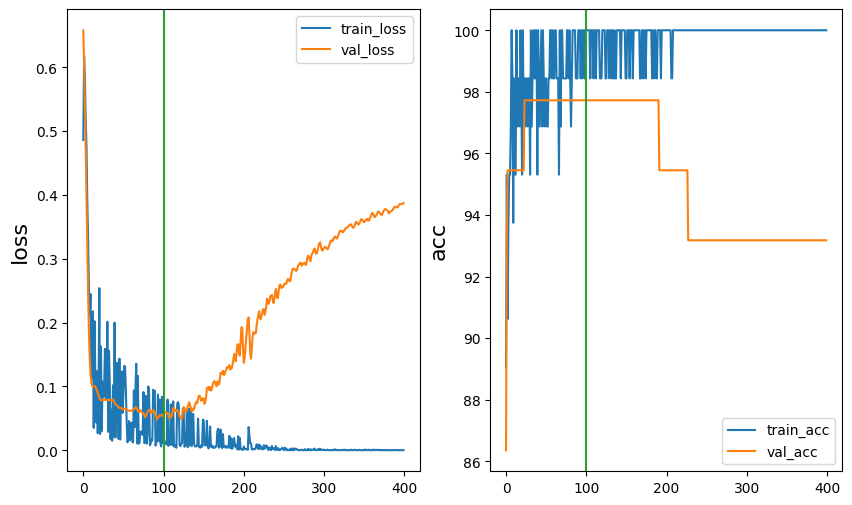

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(121)
ax1.set_ylabel('loss', size=16)
ax1.plot(train_loss_li, label='train_loss')
ax1.plot(val_loss_li, color='#ff7f0e', label=('val_loss'))
ax1.axvline(x=100, color='#2ca02c')
ax1.legend()

ax2=fig.add_subplot(122)
ax2.set_ylabel('acc', size=16)
ax2.plot(train_acc_li, label='train_acc')
ax2.plot(val_acc_li, color='#ff7f0e', label='val_acc')
ax2.axvline(x=100, color='#2ca02c')
ax2.legend()

plt.show()

In [74]:
import numpy as np
import torch

class EarlyStopping:
  def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
    self.patience=patience
    self.verbose=verbose
    self.counter=0
    self.best_score=None
    self.early_stop=False
    self.val_loss_min=np.Inf
    self.dalta=delta
    self.path=path
    self.trace_func=trace_func

  def __call__(self, val_loss, model):
    score=-val_loss
    if self.best_score is None:
      self.best_score = score
      self.save_checkpoint(val_loss, model)
    elif score < self.best_score + self.dalta:
      self.counter += 1
      self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')

      if self.counter >= self.patience:
        self.early_stop = True

    else:
      self.best_score =score
      self.save_checkpoint(val_loss, model)
      self.counter = 0

  def save_checkpoint(self, val_loss, model):
    if self.verbose:
      self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).Saving model...')
      torch.save(model.state_dict(), self.path)
      self.val_loss_min = val_loss


In [75]:
EPOCHS=400

early_stopping =EarlyStopping(patience=10, verbose=True)

model=BinaryClassificationNet()
model.to(device)
optimizer =optim.Adam(model.parameters(), lr=LEARNING_RATE)

model.train()

train_loss_li=[]
train_acc_li=[]
val_loss_li=[]
val_acc_li=[]

for epoch in range(EPOCHS):
  for X_batch_train, y_batch_train in train_loader:
    X_batch_train, y_batch_train =X_batch_train.to(device), y_batch_train.to(device)
    y_logits = model(X_batch_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_batch_train)
    acc = binary_acc(y_true = y_batch_train, y_pred=y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  model.eval()

  with torch.no_grad():
    for X_batch_val, y_batch_val in val_loader:
      X_batch_val, y_batch_val =X_batch_val.to(device), y_batch_val.to(device)
      val_logits = model(X_batch_val).squeeze()
      val_pred = torch.round(torch.sigmoid(val_logits))
      val_loss = loss_fn(val_logits, y_batch_val)
      val_acc = binary_acc(y_true = y_batch_val, y_pred=val_pred)

  if epoch % 10 ==0:
    print(f'Epoch: {epoch} | Train_loss: {loss:.5f}, Train_acc: {acc:.2f}%')
    print(f'Epoch: {epoch} | Val_loss: {val_loss:.5f}, Val_acc:{val_acc:.2f}%')

  train_loss_li.append(loss.item())
  train_acc_li.append(acc)
  val_loss_li.append(val_loss.item())
  val_acc_li.append(val_acc)

  early_stopping(val_loss, model)

  if early_stopping.early_stop:
    break

Epoch: 0 | Train_loss: 0.56188, Train_acc: 85.94%
Epoch: 0 | Val_loss: 0.71609, Val_acc:0.00%
Validation loss decreased (inf --> 0.716088).Saving model...
Validation loss decreased (0.716088 --> 0.666076).Saving model...
Validation loss decreased (0.666076 --> 0.608042).Saving model...
Validation loss decreased (0.608042 --> 0.542579).Saving model...
Validation loss decreased (0.542579 --> 0.468475).Saving model...
Validation loss decreased (0.468475 --> 0.386414).Saving model...
Validation loss decreased (0.386414 --> 0.303552).Saving model...
Validation loss decreased (0.303552 --> 0.228087).Saving model...
Validation loss decreased (0.228087 --> 0.166834).Saving model...
Validation loss decreased (0.166834 --> 0.121170).Saving model...
Epoch: 10 | Train_loss: 0.21479, Train_acc: 98.44%
Epoch: 10 | Val_loss: 0.09075, Val_acc:97.73%
Validation loss decreased (0.121170 --> 0.090745).Saving model...
Validation loss decreased (0.090745 --> 0.073233).Saving model...
Validation loss decrea

46


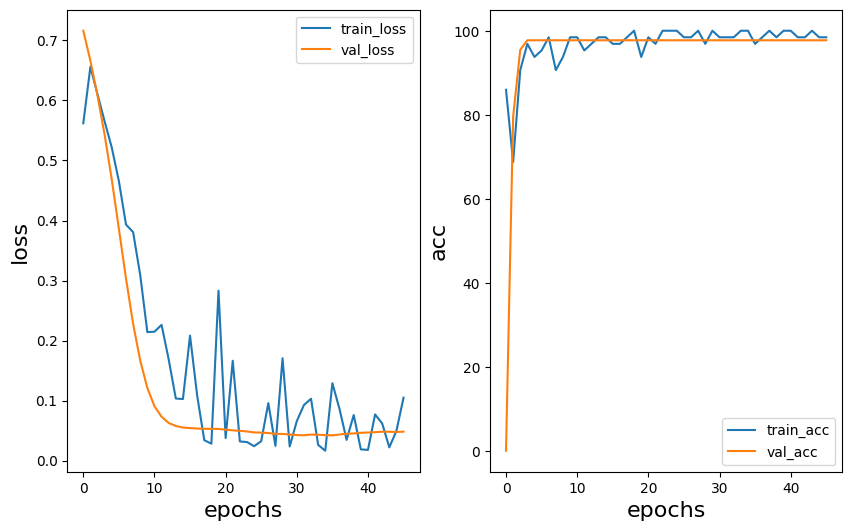

In [76]:
print(len(val_loss_li))

fig = plt.figure(figsize=(10, 6))

ax1=fig.add_subplot(121)
ax1.set_xlabel('epochs', size=16)
ax1.set_ylabel('loss', size=16)
ax1.plot(train_loss_li, label='train_loss')
ax1.plot(val_loss_li, color='#ff7f0e', label='val_loss')
ax1.legend()

ax2=fig.add_subplot(122)
ax2.set_ylabel('acc', size=16)
ax2.set_xlabel('epochs', size=16)
ax2.plot(train_acc_li, label='train_acc')
ax2.plot(val_acc_li, color='#ff7f0e', label='val_acc')
ax2.legend()

plt.show()